In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import seaborn as sns

In [4]:
sns.set_style("whitegrid")

In [5]:
df=pd.read_csv("netflix_titles.csv")

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


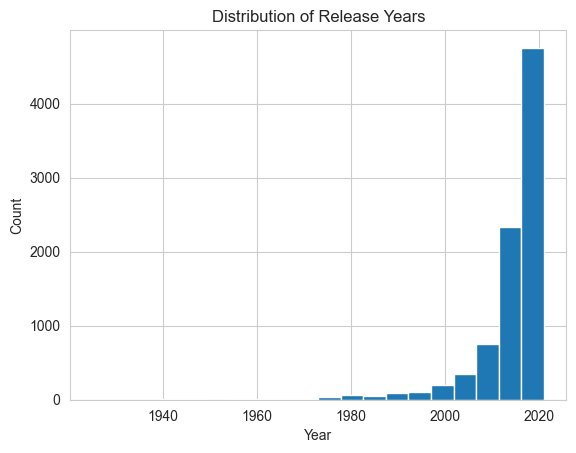

In [9]:
df['release_year'].hist(bins=20)
plt.title("Distribution of Release Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


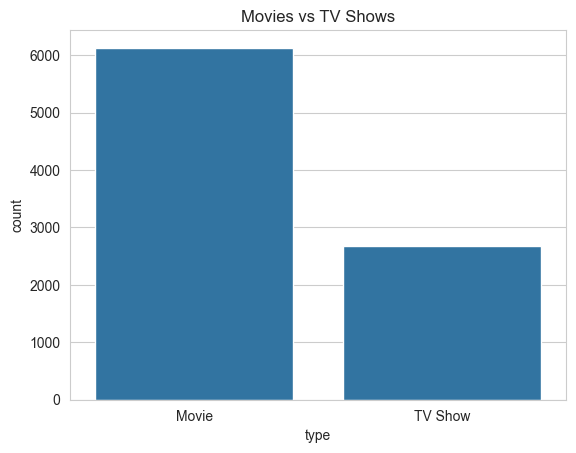

In [10]:
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows")
plt.show()


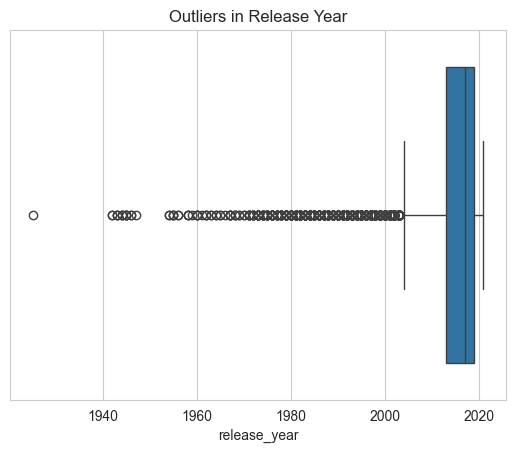

In [11]:
sns.boxplot(x=df['release_year'])
plt.title("Outliers in Release Year")
plt.show()


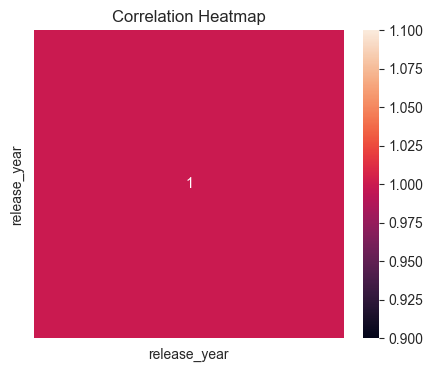

In [12]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['release_year']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


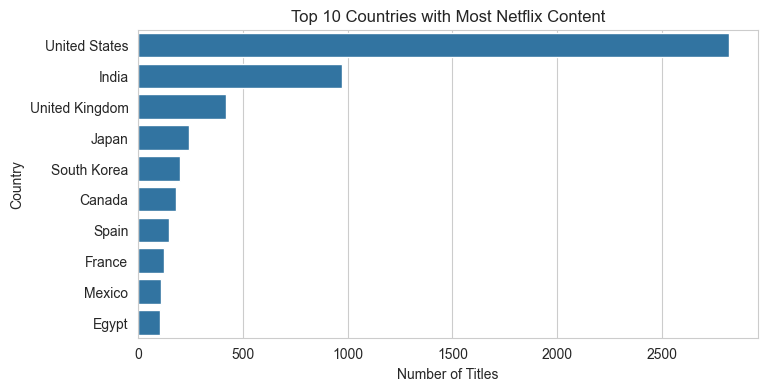

In [13]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


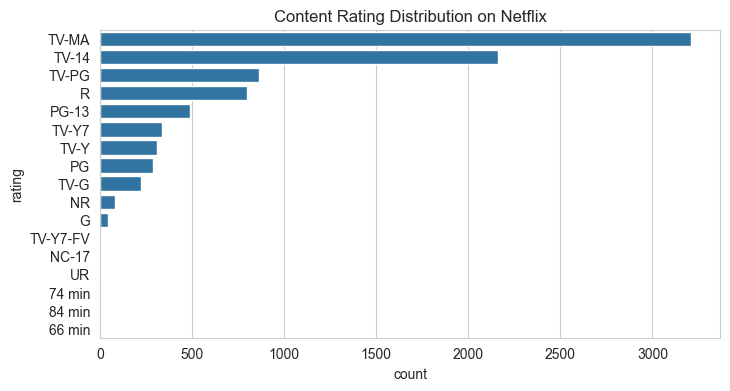

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Content Rating Distribution on Netflix")
plt.show()


In [18]:
df_movies = df[df['type'] == 'Movie']
df_movies['duration_min'] = df_movies['duration'].str.replace(' min','').astype(float)


C:\Users\harini\AppData\Local\Temp\ipykernel_12624\12682098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration_min'] = df_movies['duration'].str.replace(' min','').astype(float)


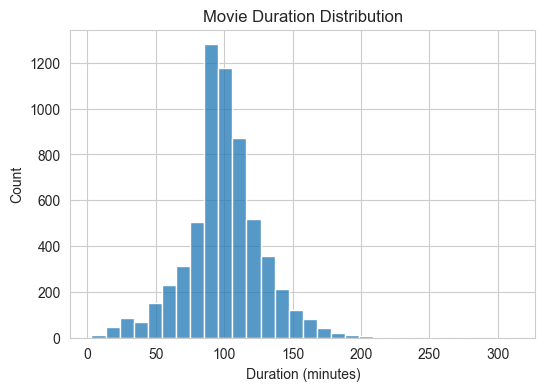

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df_movies['duration_min'], bins=30)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.show()


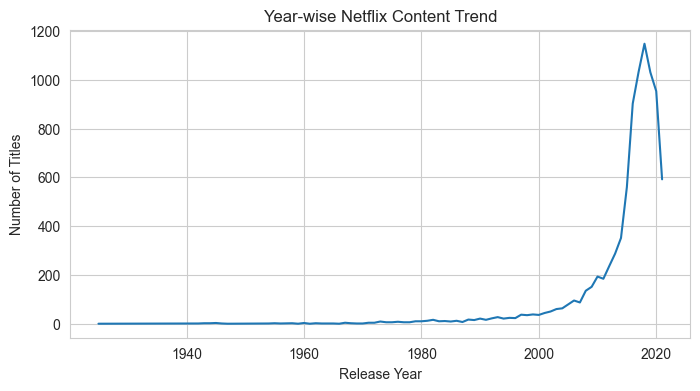

In [20]:
year_count = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(8,4))
plt.plot(year_count.index, year_count.values)
plt.title("Year-wise Netflix Content Trend")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()
